## Лабораторная работа №3

Задание 1 . Провести классификацию найденного датасета, методами линеной и логистической регрессий . В формате *Markdown* написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('classified_data.csv')
data

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [7]:
label_encoder = LabelEncoder()

# data['Grade Encoded'] = label_encoder.fit_transform(data['Grade'])
# data['Sub Grade Encoded'] = label_encoder.fit_transform(data['Sub Grade'])
# data['Employment Duration Encoded'] = label_encoder.fit_transform(data['Employment Duration'])
# data['Verification Status Encoded'] = label_encoder.fit_transform(data['Verification Status'])
# data['Loan Title Encoded'] = label_encoder.fit_transform(data['Loan Title'])
# data['Initial List Status Encoded'] = label_encoder.fit_transform(data['Initial List Status'])

non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
data = data.drop("ID", axis=1)
data = data.drop("Accounts Delinquent", axis=1)

data = data.drop(columns=non_numeric_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Home Ownership                67463 non-null  float64
 6   Debit to Income               67463 non-null  float64
 7   Delinquency - two years       67463 non-null  int64  
 8   Inquires - six months         67463 non-null  int64  
 9   Open Account                  67463 non-null  int64  
 10  Public Record                 67463 non-null  int64  
 11  Revolving Balance             67463 non-null  int64  
 12  Revolving Utilities           67463 non-null  float64
 13  T

In [13]:
X = data.drop(columns=['Loan Status'])
y = data['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan Status', axis=1), data['Loan Status'], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

under_sampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())
print(y_test.unique())

linear_model = LinearRegression()

linear_params = {'fit_intercept': [True, False]}

linear_grid = GridSearchCV(linear_model, linear_params, cv=5)

linear_grid.fit(X_resampled, y_resampled)

print("Лучшие параметры для линейной регрессии:", linear_grid.best_params_)

0    4388
1    4388
Name: Loan Status, dtype: int64
[0 1]
Лучшие параметры для линейной регрессии: {'fit_intercept': True}


MAE:  0.4992217188331398
MSE:  0.25073846700759483
R^2:  -2.014646488033419


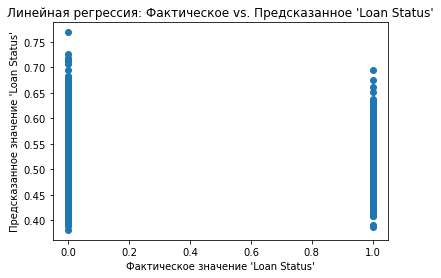

              precision    recall  f1-score   support

           0       0.91      0.54      0.68     18386
           1       0.09      0.47      0.16      1853

    accuracy                           0.54     20239
   macro avg       0.50      0.51      0.42     20239
weighted avg       0.84      0.54      0.63     20239



In [14]:
linear_predictions = linear_grid.predict(X_test)

mae = mean_absolute_error(y_test, linear_predictions)
mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)

plt.scatter(y_test, linear_predictions)
plt.xlabel("Фактическое значение 'Loan Status'")
plt.ylabel("Предсказанное значение 'Loan Status'")
plt.title("Линейная регрессия: Фактическое vs. Предсказанное 'Loan Status'")
plt.show()

rounded_predictions = [round(pred) for pred in linear_predictions]

print(classification_report(y_test, rounded_predictions, zero_division=1))



Лучшие параметры для логистической регрессии: {'C': 0.1, 'penalty': 'l1'}
Отчет о классификации для логистической регрессии:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     18386
           1       0.00      0.00      0.00      1853

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.83      0.91      0.86     20239



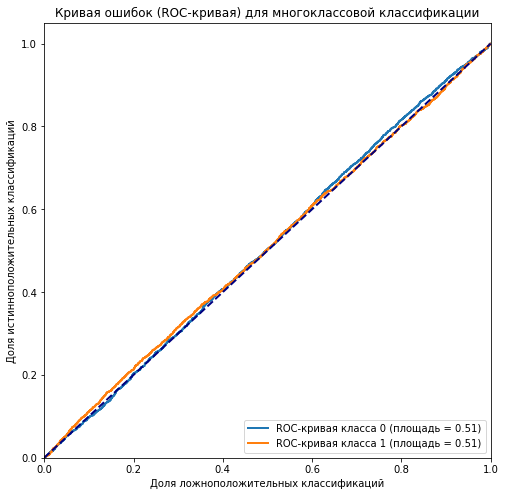

In [16]:
X = data.drop('Loan Status', axis=1) 
y = data['Loan Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

logistic_model = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=1000)

logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5)
logistic_grid.fit(X_resampled, y_resampled)

print("Лучшие параметры для логистической регрессии:", logistic_grid.best_params_)

best_logistic_model = LogisticRegression(
    multi_class='auto',
    solver='liblinear',
    max_iter=1000,
    C=logistic_grid.best_params_['C'],
    penalty=logistic_grid.best_params_['penalty']
)

best_logistic_model.fit(X_train, y_train)

logistic_predictions = best_logistic_model.predict(X_test)
logistic_classification_report = classification_report(y_test, logistic_predictions, zero_division=0)
print("Отчет о классификации для логистической регрессии:\n", logistic_classification_report)

logistic_probabilities = best_logistic_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):  
    fpr[i], tpr[i], _ = roc_curve(y_test == i, logistic_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 8))
for i in range(2):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC-кривая класса {0} (площадь = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций')
plt.title('Кривая ошибок (ROC-кривая) для многоклассовой классификации')
plt.legend(loc='lower right')
plt.show()